### Classification with CNN

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
training = '/content/gdrive/My Drive/Computer Vision/Assignment/clothing-dataset-tiny/clothing-dataset-tiny/train'
img_size = (128,128)
classes = sorted(os.listdir(training))
print(classes)

['dress', 'hat', 'pants', 'shoes']


In [3]:
!pip install keras==2.7

import sys
import keras
print('Keras version:',keras.__version__)

from keras import backend as K

Keras version: 2.7.0


In [4]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 578 images belonging to 4 classes.
Preparing validation dataset...
Found 245 images belonging to 4 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from tensorflow.keras import optimizers
from keras.layers import Dropout
from keras.regularizers import l2 

model = Sequential()
#model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))
model.add(Conv2D(32, (6, 6), kernel_regularizer = l2(0.02), bias_regularizer = l2(0.02), input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.55))

#model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

opt = optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 61, 61, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 25088)            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training the model

In [ ]:
num_epochs = 20
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
19/19 [==============================] - 30s 2s/step - loss: 1.4181 - accuracy: 0.4745 - val_loss: 1.4563 - val_accuracy: 0.4750
Epoch 2/20
19/19 [==============================] - 28s 1s/step - loss: 1.1775 - accuracy: 0.5055 - val_loss: 1.2126 - val_accuracy: 0.7208
Epoch 3/20
19/19 [==============================] - 27s 1s/step - loss: 0.9557 - accuracy: 0.6843 - val_loss: 1.1350 - val_accuracy: 0.8083
Epoch 4/20
19/19 [==============================] - 28s 1s/step - loss: 0.7514 - accuracy: 0.7536 - val_loss: 0.8300 - val_accuracy: 0.7875
Epoch 5/20
19/19 [==============================] - 28s 1s/step - loss: 0.6194 - accuracy: 0.7993 - val_loss: 0.7274 - val_accuracy: 0.8000
Epoch 6/20
19/19 [==============================] - 27s 1s/step - loss: 0.6383 - accuracy: 0.8011 - val_loss: 0.8415 - val_accuracy: 0.7833
Epoch 7/20
19/19 [==============================] - 28s 1s/step - loss: 0.5645 - accuracy: 0.8193 - val_loss: 0.7860 - val_accuracy: 0.7875
Epoch 8/20
19/19 [==

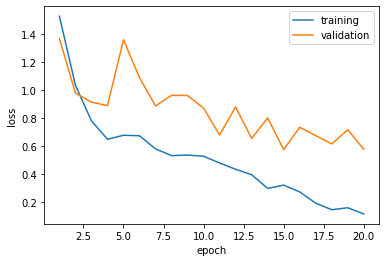

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Generating predictions from validation data...


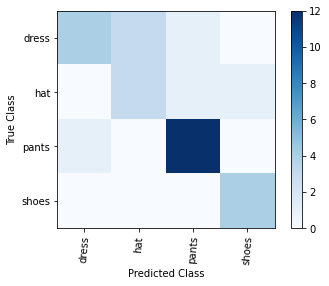

In [11]:
print("Generating predictions from validation data...")
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

class_probabilities = model.predict(x_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [12]:
from keras.models import load_model

modelFileName = 'shape-classifier.h5'

model.save(modelFileName) 
print("Model saved.")

del model 

Model saved.


In [13]:
def resize_image(src_img, size=(128,128), bg_color="white"): 
    from PIL import Image

    src_img.thumbnail(size, Image.ANTIALIAS)
    new_image = Image.new("RGB", size, bg_color)
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
    return new_image

def predict_image(classifier, image_array):
    import numpy as np
    img_features = image_array.astype('float32')
    img_features /= 255
    classnames = ['dress', 'hat', 'pants', 'shoes']
    predictions = classifier.predict(img_features)
    predicted_classes = []
    for prediction in predictions:
        class_idx = np.argmax(prediction)
        predicted_classes.append(classnames[int(class_idx)])
    return predicted_classes

print("Functions created - ready to use model for inference.")
  

Functions created - ready to use model for inference.


In [14]:
import os
from random import randint
import numpy as np
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot as plt
%matplotlib inline

modelFileName = 'shape-classifier.h5'
model = load_model(modelFileName) 

test_folder = '/content/gdrive/My Drive/Computer Vision/Assignment/clothing-dataset-tiny/clothing-dataset-tiny/test'
test_image_files = os.listdir(test_folder)

image_arrays = []

size = (128,128)
background_color="white"

fig = plt.figure(figsize=(12, 8))

for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(test_folder, test_image_files[file_idx]))
    
    resized_img = np.array(resize_image(img, size, background_color))
                      
    image_arrays.append(resized_img)

predictions = predict_image(model, np.array(image_arrays))

for idx in range(len(predictions)):
    a=fig.add_subplot(1,len(predictions),idx+1)
    imgplot = plt.imshow(image_arrays[idx])
    a.set_title(predictions[idx])

IsADirectoryError: ignored

<Figure size 864x576 with 0 Axes>

### Transfer Learning


In [ ]:
classes = sorted(os.listdir(training))
print(classes)

pretrained_size = (224,224)
batch_size = 15


In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)

In [ ]:
from keras import Model
from keras.layers import Flatten, Dense
from tensorflow.keras import optimizers

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(len(classes), activation='softmax')(x) 
model = Model(inputs=base_model.input, outputs=prediction_layer)

opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


print(model.summary())

In [ ]:
num_epochs = 5
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

In [ ]:
def resize_image(src_img, size=(128,128), bg_color="white"): 
    from PIL import Image

    src_img.thumbnail(size, Image.ANTIALIAS)
    
    new_image = Image.new("RGB", size, bg_color)
    
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
  
    return new_image

def predict_image(classifier, image_array):
    import numpy as np
    
    img_features = image_array.astype('float32')
    img_features /= 255
    
    classnames = ['dress', 'hat', 'pants', 'shoes']
    
    predictions = classifier.predict(img_features)
    
    predicted_classes = []
    for prediction in predictions:
        class_idx = np.argmax(prediction)
        predicted_classes.append(classnames[int(class_idx)])
    return predicted_classes

print("Functions created - ready to use model for inference.")

In [ ]:
test_folder = '/content/gdrive/My Drive/Computer Vision/Assignment/clothing-dataset-tiny/clothing-dataset-tiny/test'
test_image_files = os.listdir(test_folder)

image_arrays = []

size = (224,224)
background_color="white"

fig = plt.figure(figsize=(12, 8))

for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(test_folder, test_image_files[file_idx]))
    
    resized_img = np.array(resize_image(img, size, background_color))
                      
    image_arrays.append(resized_img)

predictions = predict_image(model, np.array(image_arrays))

for idx in range(len(predictions)):
    a=fig.add_subplot(1,len(predictions),idx+1)
    imgplot = plt.imshow(image_arrays[idx])
    a.set_title(predictions[idx])